In [21]:
# Data Paths
lidar_path = 'data/measurements/'
era5_path = 'data/reanalysis/'
turbines_existing_path = 'data/turbine-info/coordinates/existing/'
turbines_planned_future_path = 'data/turbine-info/coordinates/planned_future/'
turbines_planned_in_operation_before_2030_path = 'data/turbine-info/coordinates/planned_in_operation_before_2030/'
turbines_planned_netherlands_path = 'data/turbine-info/coordinates/planned_netherlands/'
turbines_area_of_interest_path = 'data/turbine-info/coordinates/area_of_interest/'
shapefiles_DEU_path = 'data/shapefiles/DEU/*'
shapefiles_DNK_path = 'data/shapefiles/DNK/*'
shapefiles_NLD_path = 'data/shapefiles/NLD/*'
turbine_power_curves_path = 'data/turbine-info/power_curves/'

In [22]:
import os
import numpy as np
import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# for plotting the farm Layout
import foxes
import foxes.variables as FV
import foxes.constants as FC
#pip install foxes

# Function to read and extract data from netcdf files
def read_netcdf(path):
    data = nc.Dataset(path, 'r')
    return data

# Function to read and extract data from csv files
def read_csv(path):
    data = pd.read_csv(path)
    return data

Turbine 0, T0: 
Turbine 1, T1: 
Turbine 2, T2: 
Turbine 3, T3: 
Turbine 4, T4: 
Turbine 5, T5: 
Turbine 6, T6: 
Turbine 7, T7: 
Turbine 8, T8: 
Turbine 9, T9: 
Turbine 10, T10: 
Turbine 11, T11: 
Turbine 12, T12: 
Turbine 13, T13: 
Turbine 14, T14: 
Turbine 15, T15: 
Turbine 16, T16: 
Turbine 17, T17: 
Turbine 18, T18: 
Turbine 19, T19: 
Turbine 20, T20: 
Turbine 21, T21: 
Turbine 22, T22: 
Turbine 23, T23: 
Turbine 24, T24: 
Turbine 25, T25: 
Turbine 26, T26: 
Turbine 27, T27: 
Turbine 28, T28: 
Turbine 29, T29: 
Turbine 30, T30: 
Turbine 31, T31: 
Turbine 32, T32: 
Turbine 33, T33: 
Turbine 34, T34: 
Turbine 35, T35: 
Turbine 36, T36: 
Turbine 37, T37: 
Turbine 38, T38: 
Turbine 39, T39: 
Turbine 40, T40: 
Turbine 41, T41: 
Turbine 42, T42: 
Turbine 43, T43: 
Turbine 44, T44: 
Turbine 45, T45: 
Turbine 46, T46: 
Turbine 47, T47: 
Turbine 48, T48: 
Turbine 49, T49: 
Turbine 50, T50: 
Turbine 51, T51: 
Turbine 52, T52: 
Turbine 53, T53: 
Turbine 54, T54: 
Turbine 55, T55: 
Turbine 56, 

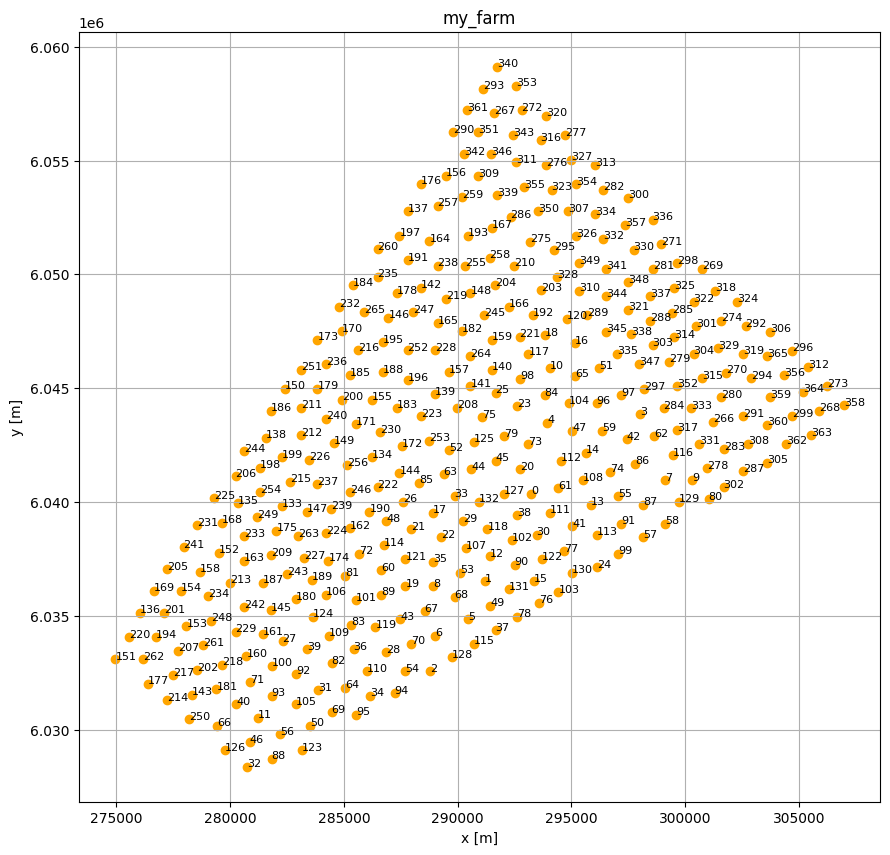

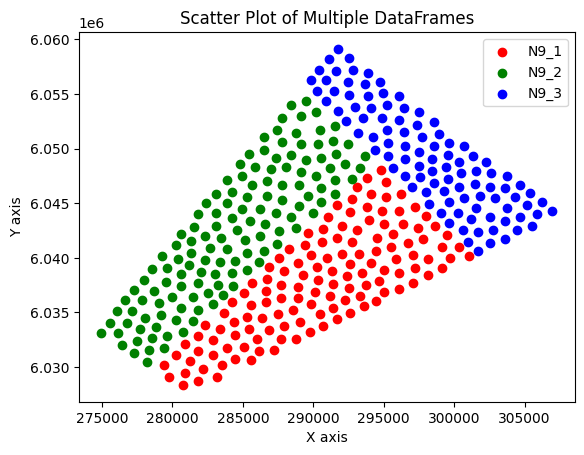

In [26]:

current_path =  turbines_area_of_interest_path
#current_path = turbines_existing_path
#current_path = turbines_planned_future_path
#current_path = turbines_planned_in_operation_before_2030_path
#current_path = turbines_planned_netherlands_path

# get the name of files in dir
turb_files = os.listdir(current_path)

# read files in path to dataframe and put's those in list 
dfs = [read_csv(current_path + file) for file in turb_files] #read files in path to dataframe and put's those in list 


farm = foxes.WindFarm(name="my_farm")
for dataframes in dfs:
     foxes.input.farm_layout.add_from_df(farm, dataframes) # also prints Turbines 'Turbine 0, T0: '

# the method:
'''
    .get_figure(
        self,
        color_by=None,
        fontsize=8,
        figsize=None,
        annotate=1,
        title=None,
        fig=None,
        ax=None,
        normalize_D=False,
        ret_im=False,
        bargs={},
        anno_delx=0,
        anno_dely=0,
        **kwargs,)
'''
# plot  with foxes
ax = foxes.output.FarmLayoutOutput(farm).get_figure(figsize=(17, 10))
plt.show()   

# Note: I couldn't get it to work with the plot feature of foxes. For Plotting multiple Farms in a picture we should use .scatter or something similar.
area   = ["N9_1", "N9_2", "N9_3"]
colors = ['red', 'green', 'blue']
fig, ax = plt.subplots()
for df, color,area in zip(dfs, colors,area):
    ax.scatter(df['x'], df['y'], color=color, label=area)
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Scatter Plot of Multiple DataFrames')
plt.show()
 

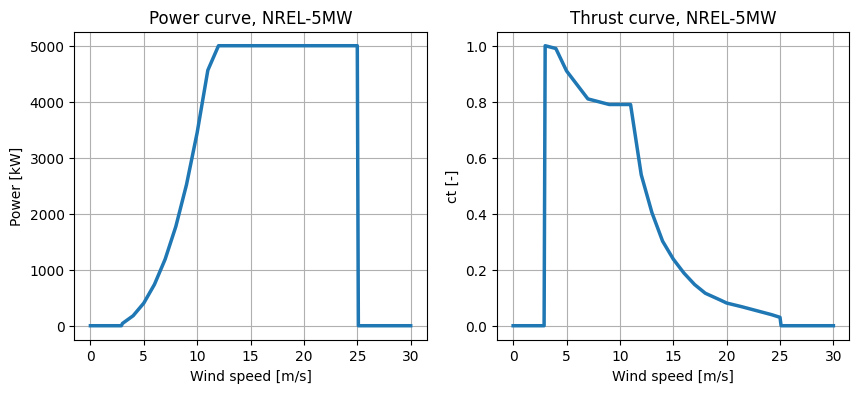

In [24]:
# https://fraunhoferiwes.github.io/foxes.docs/notebooks/data.html#Power-and-thrust-curves
# We can add the powercurve to our foxes Model, this has a print function too

# select a turbine
Turb_Name = 'NREL-5MW'
Turb_Path = 'data/turbine-info/power_curves/NREL-5MW-D126-H90.csv'
#Turb_Name = 'IEA-15MW'
#Turb_Path = 'data/turbine-info/power_curves/IEA-15MW-D240-H150.csv'

# creat the model object
mbook = foxes.models.ModelBook()
# add a turbine and manualy add the powercurve via csv
mbook.turbine_types[Turb_Name] = foxes.models.turbine_types.PCtFile(Turb_Path)

# Plot powercurve
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
o = foxes.output.TurbineTypeCurves(mbook)
o.plot_curves(Turb_Name, [FV.P, FV.CT], axs=axs)
plt.show()